In [1]:
import torch

In [3]:
torch.cuda.is_available()

True

In [4]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [5]:
!unzip /content/drive/MyDrive/a1.zip -d /content/

Archive:  /content/drive/MyDrive/a1.zip
   creating: /content/a1/
   creating: /content/a1/algae_data_11/
   creating: /content/a1/algae_data_11/Anabaena/
  inflating: /content/a1/algae_data_11/Anabaena/ΓòÖ╧ÇΓò¿ΓòÜΓòÿ╧â_1.jpg  
  inflating: /content/a1/algae_data_11/Anabaena/ΓòÖ╧ÇΓò¿ΓòÜΓòÿ╧â_10.jpg  
  inflating: /content/a1/algae_data_11/Anabaena/ΓòÖ╧ÇΓò¿ΓòÜΓòÿ╧â_100.jpg  
  inflating: /content/a1/algae_data_11/Anabaena/ΓòÖ╧ÇΓò¿ΓòÜΓòÿ╧â_101.jpg  
  inflating: /content/a1/algae_data_11/Anabaena/ΓòÖ╧ÇΓò¿ΓòÜΓòÿ╧â_102.jpg  
  inflating: /content/a1/algae_data_11/Anabaena/ΓòÖ╧ÇΓò¿ΓòÜΓòÿ╧â_103.jpg  
  inflating: /content/a1/algae_data_11/Anabaena/ΓòÖ╧ÇΓò¿ΓòÜΓòÿ╧â_104.jpg  
  inflating: /content/a1/algae_data_11/Anabaena/ΓòÖ╧ÇΓò¿ΓòÜΓòÿ╧â_105.jpg  
  inflating: /content/a1/algae_data_11/Anabaena/ΓòÖ╧ÇΓò¿ΓòÜΓòÿ╧â_106.jpg  
  inflating: /content/a1/algae_data_11/Anabaena/ΓòÖ╧ÇΓò¿ΓòÜΓòÿ╧â_107.jpg  
  inflating: /content/a1/algae_data_11/Anabaena/ΓòÖ╧ÇΓò¿ΓòÜΓòÿ╧â_108.jpg  
  inflating: /content/a

In [6]:
pip install split-folders


In [7]:
import splitfolders

# Input dataset path and output folder
input_folder = "/content/a1/algae_data_11"
output_folder = "/content/output"

# Split data: 70% train, 20% validation, 10% test
splitfolders.ratio(input_folder, output=output_folder,
                   seed=42, ratio=(0.8, 0.1, 0.1))


Copying files: 1650 files [00:00, 3041.05 files/s]


In [8]:
import tensorflow as tf

# Set paths for train, validation, and test directories
train_dir = "output/train"
val_dir = "output/val"
test_dir = "output/test"

# Image parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 8

# Load datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir, image_size=IMG_SIZE, batch_size=BATCH_SIZE, label_mode='categorical')

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir, image_size=IMG_SIZE, batch_size=BATCH_SIZE, label_mode='categorical')

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir, image_size=IMG_SIZE, batch_size=BATCH_SIZE, label_mode='categorical')


Found 1320 files belonging to 11 classes.
Found 165 files belonging to 11 classes.
Found 165 files belonging to 11 classes.


In [10]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load the ResNet-50 model with pre-trained ImageNet weights, excluding the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base model layers to prevent them from being trained initially
base_model.trainable = False

# Build the full model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(len(train_ds.class_names), activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_ds, validation_data=val_ds, epochs=100)

# Unfreeze some layers for fine-tuning
base_model.trainable = True

# Re-compile with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])




Epoch 1/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.6365 - loss: 1.2191 - val_accuracy: 0.9333 - val_loss: 0.3066
Epoch 2/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.9440 - loss: 0.1926 - val_accuracy: 0.8545 - val_loss: 0.4333
Epoch 3/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9642 - loss: 0.1332 - val_accuracy: 0.9212 - val_loss: 0.2564
Epoch 4/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9788 - loss: 0.0571 - val_accuracy: 0.9394 - val_loss: 0.2076
Epoch 5/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.9972 - loss: 0.0230 - val_accuracy: 0.9394 - val_loss: 0.2473
Epoch 6/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9995 - loss: 0.0129 - val_accuracy: 0.9273 - val_loss: 0.2776
Epoch 7/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.9981 - loss: 0.0145 - val_accuracy: 0.9576 - val_loss: 0.2365
Epoch 8/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9819 - loss: 0.04

In [13]:
# Fine-tune the model
model.fit(train_ds, validation_data=val_ds, epochs=100)

Epoch 1/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 19s 113ms/step - accuracy: 0.8914 - loss: 0.4205 - val_accuracy: 0.7030 - val_loss: 1.2985
Epoch 2/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 18s 107ms/step - accuracy: 0.9657 - loss: 0.0928 - val_accuracy: 0.8606 - val_loss: 0.5542
Epoch 3/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 20s 106ms/step - accuracy: 0.9900 - loss: 0.0438 - val_accuracy: 0.8545 - val_loss: 0.8565
Epoch 4/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 18s 111ms/step - accuracy: 0.9979 - loss: 0.0096 - val_accuracy: 0.9273 - val_loss: 0.4427
Epoch 5/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 20s 107ms/step - accuracy: 0.9984 - loss: 0.0076 - val_accuracy: 0.8727 - val_loss: 0.5879
Epoch 6/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 18s 111ms/step - accuracy: 0.9992 - loss: 0.0028 - val_accuracy: 0.8788 - val_loss: 0.6156
Epoch 7/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 20s 105ms/step - accuracy: 0.9968 - loss: 0.0117 - val_accuracy: 0.8970 - val_loss: 0.5382
Epoch 8/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 21s 110ms/step - accuracy: 0.9989 -

In [14]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Get predictions on the test set
y_pred = []
y_true = []

for images, labels in test_ds:
    predictions = model.predict(images)
    y_pred.extend(tf.argmax(predictions, axis=1).numpy())
    y_true.extend(tf.argmax(labels, axis=1).numpy())


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8999 - loss: 0.4278
Test Accuracy: 90.91%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


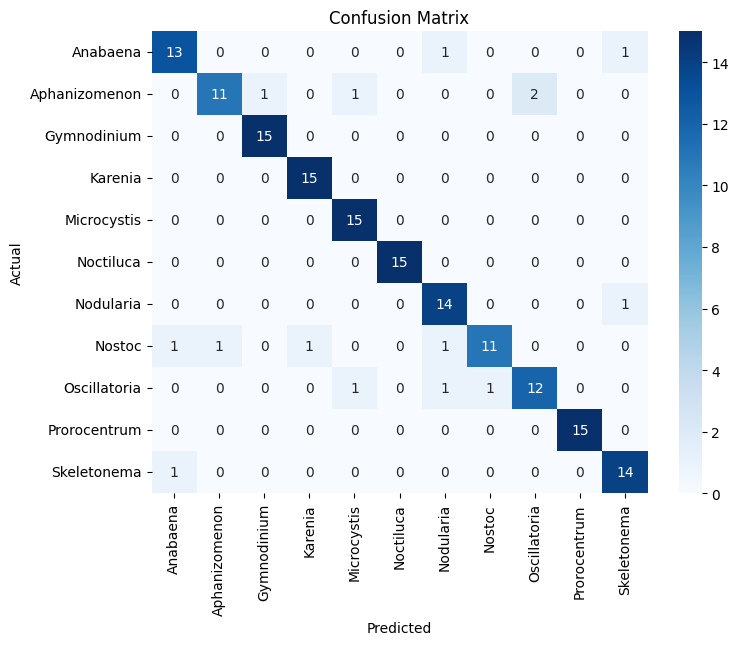

               precision    recall  f1-score   support

     Anabaena       0.87      0.87      0.87        15
Aphanizomenon       0.92      0.73      0.81        15
  Gymnodinium       0.94      1.00      0.97        15
      Karenia       0.94      1.00      0.97        15
  Microcystis       0.88      1.00      0.94        15
    Noctiluca       1.00      1.00      1.00        15
    Nodularia       0.82      0.93      0.88        15
       Nostoc       0.92      0.73      0.81        15
 Oscillatoria       0.86      0.80      0.83        15
 Prorocentrum       1.00      1.00      1.00        15
  Skeletonema       0.88      0.93      0.90        15

     accuracy                           0.91       165
    macro avg       0.91      0.91      0.91       165
 weighted avg       0.91      0.91      0.91       165



In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
class_names = test_ds.class_names

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))
